In [92]:
import pandas as pd 
import matplotlib.pyplot as plt

In [98]:
confirmed_global = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
confirmed_us = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv')
#deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
# recoveries_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
#latest_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/12-03-2021.csv')
#us_medical_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports_us/12-03-2021.csv')
#apple_mobility = pd.read_csv("https://covid19-static.cdn-apple.com/covid19-mobility-data/2203HotfixDev10/v3/en-us/applemobilitytrends-2021-12-03.csv")

In [99]:
confirmed_us.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,...,10/26/21,10/27/21,10/28/21,10/29/21,10/30/21,10/31/21,11/1/21,11/2/21,11/3/21,11/4/21,11/5/21,11/6/21,11/7/21,11/8/21,11/9/21,11/10/21,11/11/21,11/12/21,11/13/21,11/14/21,11/15/21,11/16/21,11/17/21,11/18/21,11/19/21,11/20/21,11/21/21,11/22/21,11/23/21,11/24/21,11/25/21,11/26/21,11/27/21,11/28/21,11/29/21,11/30/21,12/1/21,12/2/21,12/3/21,12/4/21
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,"Autauga, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,10061,10083,10219,10228,10239,10252,10258,10271,10284,10304,10314,10327,10331,10335,10350,10355,10373,10383,10401,10403,10407,10419,10423,10439,10457,10468,10471,10477,10495,10508,10512,10512,10517,10517,10517,10526,10527,10531,10545,10560
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,"Baldwin, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,37285,37325,37350,37372,37398,37414,37425,37445,37461,37495,37529,37633,37648,37659,37737,37745,37785,37819,37855,37865,37875,37891,37914,37940,37959,37981,37986,38000,38014,38042,38061,38061,38068,38074,38085,38104,38123,38140,38171,38195
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,"Barbour, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3583,3595,3596,3596,3599,3601,3601,3605,3607,3609,3611,3612,3614,3614,3620,3622,3631,3632,3648,3648,3648,3653,3655,3659,3660,3683,3687,3688,3690,3691,3691,3691,3694,3694,3695,3699,3700,3700,3701,3706
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,"Bibb, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,4256,4262,4275,4276,4278,4279,4281,4283,4286,4290,4295,4294,4295,4295,4301,4302,4310,4313,4317,4317,4317,4323,4325,4328,4333,4337,4337,4337,4338,4339,4340,4340,4340,4340,4340,4345,4348,4352,4354,4357
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,"Blount, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,10227,10338,10364,10371,10395,10406,10408,10423,10441,10490,10510,10527,10533,10534,10548,10547,10494,10513,10530,10534,10536,10548,10568,10598,10621,10626,10636,10640,10659,10696,10700,10700,10714,10715,10717,10729,10739,10756,10765,10779


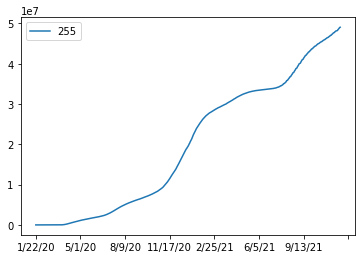

In [100]:
us =confirmed_global[confirmed_global["Country/Region"].isin(["US"])].iloc[:,4:].T
us.plot()

In [101]:
print(us)

               255
1/22/20          1
1/23/20          1
1/24/20          2
1/25/20          2
1/26/20          5
...            ...
11/30/21  48555974
12/1/21   48691353
12/2/21   48832228
12/3/21   48990127
12/4/21   49051140

[683 rows x 1 columns]


In [102]:
time = []
for columnName, columnData in us.iterrows():
  #print(columnName)
  time.append(columnName)
print(type(time))

<class 'list'>


In [113]:
time = []
cases = []
case = []
case.append(0)
for columnName, columnData in us.iterrows():
  #print(columnName)
  time.append(columnName)

for column in us:
  columnSeriesObj = us[column]
  cases = columnSeriesObj.values
  
for i in range(1,cases.size):
  growth = cases[i] - cases[i-1]
  case.append(growth)

us_daily = pd.DataFrame(list(zip(time, case)),
               columns =['time', 'case'])

683


         time    case
0     1/22/20       0
1     1/23/20       0
2     1/24/20       1
3     1/25/20       0
4     1/26/20       3
..        ...     ...
678  11/30/21  117098
679   12/1/21  135379
680   12/2/21  140875
681   12/3/21  157899
682   12/4/21   61013

[683 rows x 2 columns]


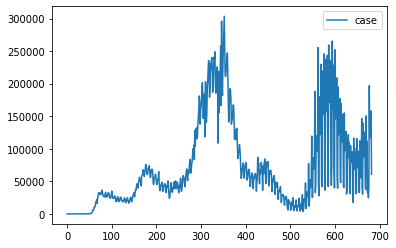

In [107]:
print(us_daily)
us_daily.plot()

In [108]:
us_daily.to_csv("us_daily.csv")

In [115]:
#source: https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [123]:
numpy.random.seed(7)

# load the dataset
dataframe = pd.read_csv('usdaily.csv', usecols=[2], engine='python')
dataset = dataframe.values


In [130]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [131]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

457 226


In [132]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [133]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [134]:
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [135]:

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
455/455 - 2s - loss: 0.0407 - 2s/epoch - 5ms/step
Epoch 2/100
455/455 - 1s - loss: 0.0187 - 662ms/epoch - 1ms/step
Epoch 3/100
455/455 - 1s - loss: 0.0085 - 644ms/epoch - 1ms/step
Epoch 4/100
455/455 - 1s - loss: 0.0042 - 653ms/epoch - 1ms/step
Epoch 5/100
455/455 - 1s - loss: 0.0033 - 642ms/epoch - 1ms/step
Epoch 6/100
455/455 - 1s - loss: 0.0032 - 637ms/epoch - 1ms/step
Epoch 7/100
455/455 - 1s - loss: 0.0032 - 623ms/epoch - 1ms/step
Epoch 8/100
455/455 - 1s - loss: 0.0032 - 605ms/epoch - 1ms/step
Epoch 9/100
455/455 - 1s - loss: 0.0032 - 618ms/epoch - 1ms/step
Epoch 10/100
455/455 - 1s - loss: 0.0032 - 606ms/epoch - 1ms/step
Epoch 11/100
455/455 - 1s - loss: 0.0032 - 623ms/epoch - 1ms/step
Epoch 12/100
455/455 - 1s - loss: 0.0032 - 629ms/epoch - 1ms/step
Epoch 13/100
455/455 - 1s - loss: 0.0032 - 643ms/epoch - 1ms/step
Epoch 14/100
455/455 - 1s - loss: 0.0032 - 631ms/epoch - 1ms/step
Epoch 15/100
455/455 - 1s - loss: 0.0032 - 630ms/epoch - 1ms/step
Epoch 16/100
455/455 -

In [136]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 16707.39 RMSE
Test Score: 61395.78 RMSE


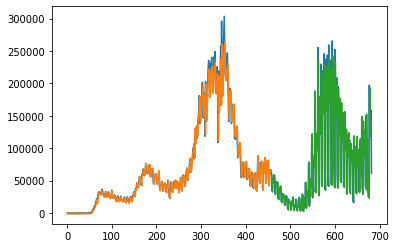

In [137]:

# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()